In [1]:
import pandas as pd 
import numpy as np
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  

In [2]:
conectar = sqlite3.connect('./Data/imoveis_dw.db')

In [3]:
imoveis = pd.read_sql_query("SELECT * FROM IMOVEIS", conectar)

In [4]:
imoveis.head()

cidade estado  area  num_quartos  num_banheiros  garagem  \
0     São Paulo     SP    70            2              1        1   
1     São Paulo     SP   320            4              4        0   
2  Porto Alegre     RS    80            1              1        1   
3  Porto Alegre     RS    51            2              1        0   
4     São Paulo     SP    25            1              1        0   

   num_andares  aceita_animais  mobilia  valor_aluguel  valor_condominio  \
0            7               1        1           3300              2065   
1           20               1        0           4960              1200   
2            6               1        0           2800              1000   
3            2               1        0           1112               270   
4            1               0        0            800                 0   

   valor_iptu  valor_seguro_incendio  
0         211                     42  
1        1750                     63  
2           0                     41  
3          22                     17  
4          25                     11

# Análise Exploratória dos Dados

In [5]:
imoveis.describe()

area   num_quartos  num_banheiros       garagem   num_andares  \
count  10692.000000  10692.000000   10692.000000  10692.000000  10692.000000   
mean     149.217920      2.506079       2.236813      1.609147      5.298167   
std      537.016942      1.171266       1.407198      1.589521      5.888747   
min       11.000000      1.000000       1.000000      0.000000      1.000000   
25%       56.000000      2.000000       1.000000      0.000000      1.000000   
50%       90.000000      2.000000       2.000000      1.000000      3.000000   
75%      182.000000      3.000000       3.000000      2.000000      8.000000   
max    46335.000000     13.000000      10.000000     12.000000    301.000000   

       aceita_animais       mobilia  valor_aluguel  valor_condominio  \
count    10692.000000  10692.000000   10692.000000      1.069200e+04   
mean         0.777778      0.243734    3896.247194      1.174022e+03   
std          0.415759      0.429354    3408.545518      1.559231e+04   
min          0.000000      0.000000     450.000000      0.000000e+00   
25%          1.000000      0.000000    1530.000000      1.700000e+02   
50%          1.000000      0.000000    2661.000000      5.600000e+02   
75%          1.000000      0.000000    5000.000000      1.237500e+03   
max          1.000000      1.000000   45000.000000      1.117000e+06   

          valor_iptu  valor_seguro_incendio  
count   10692.000000           10692.000000  
mean      366.704358              53.300879  
std      3107.832321              47.768031  
min         0.000000               3.000000  
25%        38.000000              21.000000  
50%       125.000000              36.000000  
75%       375.000000              68.000000  
max    313700.000000             677.000000

## Distribuição de preços de aluguel

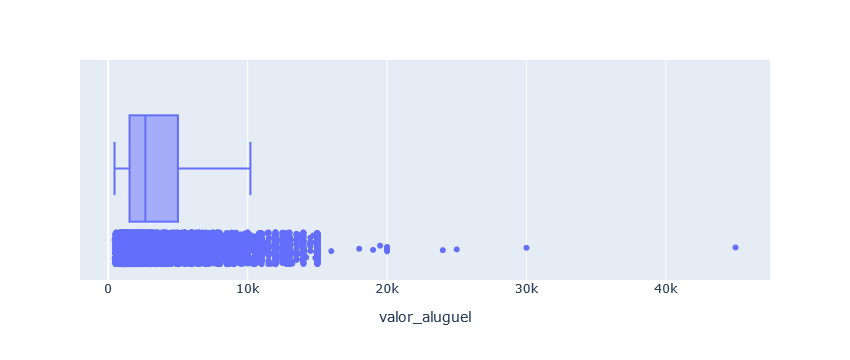

In [6]:
fig = px.box(imoveis, x = "valor_aluguel", points="all")
fig.show();

# Correlações entre atributos e preço

## Número de quartos e valor do aluguel

<Figure size 576x576 with 0 Axes>

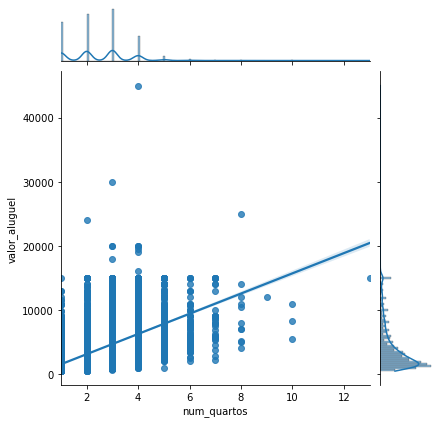

In [7]:
plt.figure(figsize=(8, 8))
ax = sns.jointplot(y=imoveis["valor_aluguel"], x=imoveis["num_quartos"], kind="reg")
plt.show()

## Aceitação de pets e valores do aluguel

In [8]:
animal_categorical = imoveis["aceita_animais"].map({1: "aceita", 0: "não aceita"})

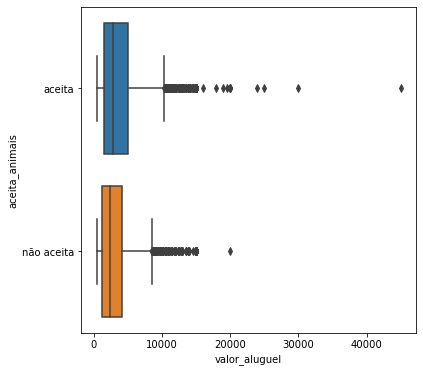

In [9]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(x = imoveis["valor_aluguel"], y = animal_categorical);
plt.show()

## Quantidade de vagas de garagem e preço dos alugueis

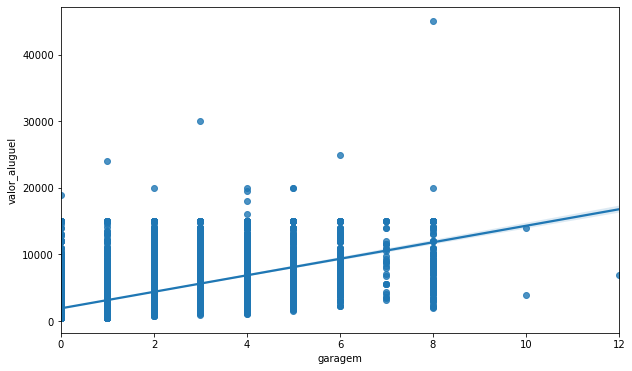

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=imoveis["garagem"], y=imoveis["valor_aluguel"]);

## Seguro incêndio

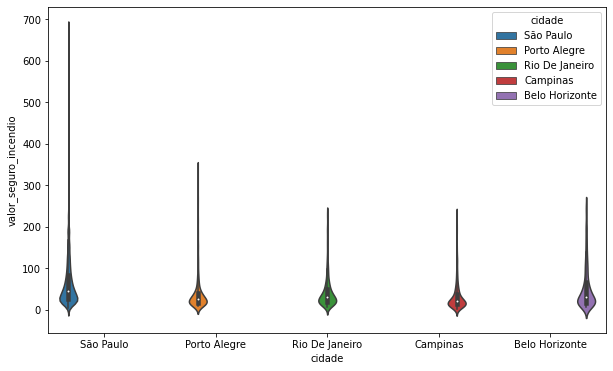

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x="cidade", y="valor_seguro_incendio", data=imoveis, hue="cidade");

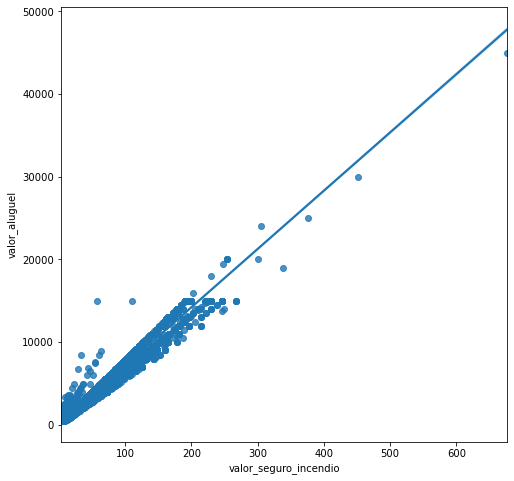

In [12]:
plt.figure(figsize=(8, 8))
ax = sns.regplot(x=imoveis["valor_seguro_incendio"], y=imoveis["valor_aluguel"]);

# Pré-processamento de dados

In [13]:
imoveis = imoveis.drop(['estado'], axis = 1) 

In [14]:
imoveis_dummies = pd.get_dummies(imoveis, columns=["cidade"], prefix=["cidade_"])

In [15]:
imoveis_dummies.head()

area  num_quartos  num_banheiros  garagem  num_andares  aceita_animais  \
0    70            2              1        1            7               1   
1   320            4              4        0           20               1   
2    80            1              1        1            6               1   
3    51            2              1        0            2               1   
4    25            1              1        0            1               0   

   mobilia  valor_aluguel  valor_condominio  valor_iptu  \
0        1           3300              2065         211   
1        0           4960              1200        1750   
2        0           2800              1000           0   
3        0           1112               270          22   
4        0            800                 0          25   

   valor_seguro_incendio  cidade__Belo Horizonte  cidade__Campinas  \
0                     42                       0                 0   
1                     63                       0                 0   
2                     41                       0                 0   
3                     17                       0                 0   
4                     11                       0                 0   

   cidade__Porto Alegre  cidade__Rio De Janeiro  cidade__São Paulo  
0                     0                       0                  1  
1                     0                       0                  1  
2                     1                       0                  0  
3                     1                       0                  0  
4                     0                       0                  1

In [16]:
imoveis_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   area                    10692 non-null  int64
 1   num_quartos             10692 non-null  int64
 2   num_banheiros           10692 non-null  int64
 3   garagem                 10692 non-null  int64
 4   num_andares             10692 non-null  int64
 5   aceita_animais          10692 non-null  int64
 6   mobilia                 10692 non-null  int64
 7   valor_aluguel           10692 non-null  int64
 8   valor_condominio        10692 non-null  int64
 9   valor_iptu              10692 non-null  int64
 10  valor_seguro_incendio   10692 non-null  int64
 11  cidade__Belo Horizonte  10692 non-null  uint8
 12  cidade__Campinas        10692 non-null  uint8
 13  cidade__Porto Alegre    10692 non-null  uint8
 14  cidade__Rio De Janeiro  10692 non-null  uint8
 15  cidade__São Paulo  

## Features Engineering

In [17]:
x = imoveis_dummies.drop(["valor_aluguel", "valor_seguro_incendio", "valor_iptu"], axis=1)  
y = imoveis_dummies["valor_aluguel"] 

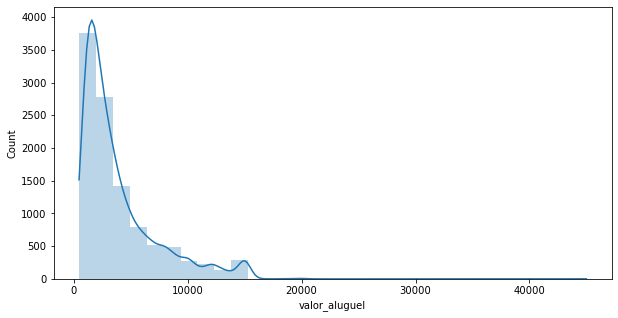

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(x = y, kde=True, alpha = 0.3, bins=30, edgecolor='none')
plt.show()

In [19]:
print("Assimetria (skewness): %f" % y.skew())
print("Achatamento (kurtosis): %f" % y.kurt())

Assimetria (skewness): 1.838877
Achatamento (kurtosis): 4.624228


In [20]:
y = np.log(y)

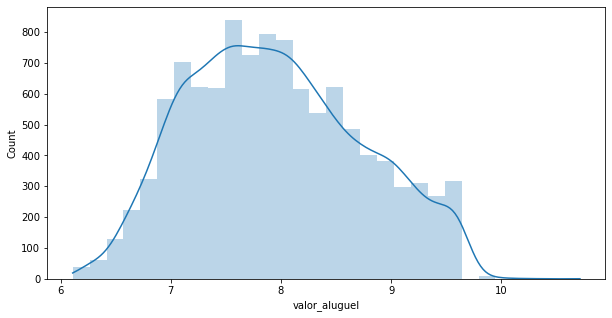

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(x = y, kde=True, alpha = 0.3, bins=30, edgecolor='none')
plt.show()

In [22]:
print("Assimetria (skewness): %f" % y.skew())
print("Achatamento (kurtosis): %f" % y.kurt())

Assimetria (skewness): 0.247150
Achatamento (kurtosis): -0.678966


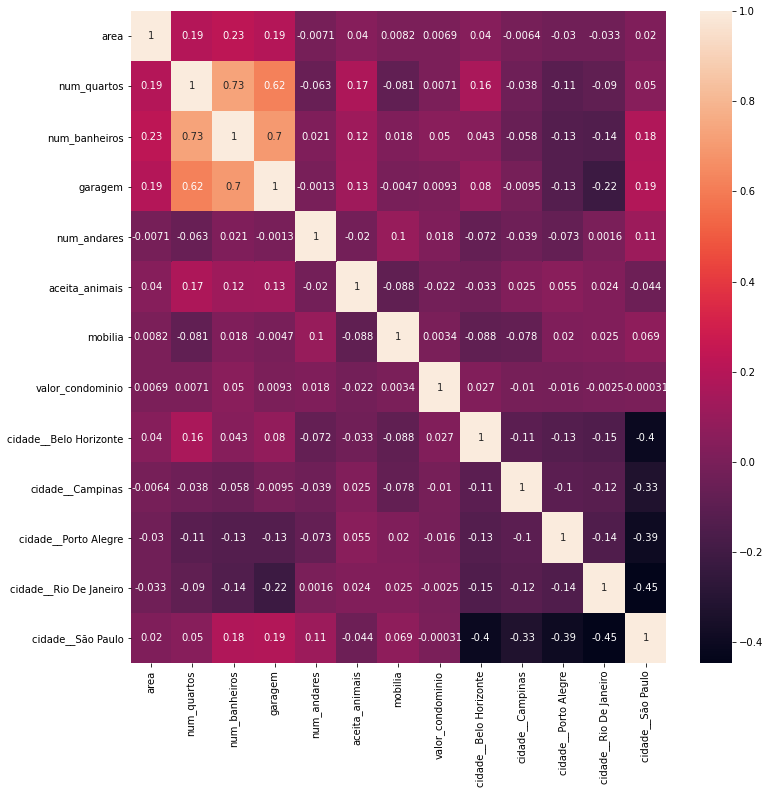

In [23]:
plt.figure(figsize=(12, 12))
corr = x.corr()
sns.heatmap(corr, annot = True);

In [24]:
x['razao_banheiros_quartos'] = x['num_banheiros'] / x['num_quartos']

In [25]:
x['razao_garagem_quartos'] = x['garagem'] / x['num_quartos']

In [26]:
x = x.drop(['num_banheiros', 'num_quartos', 'garagem'], axis=1)

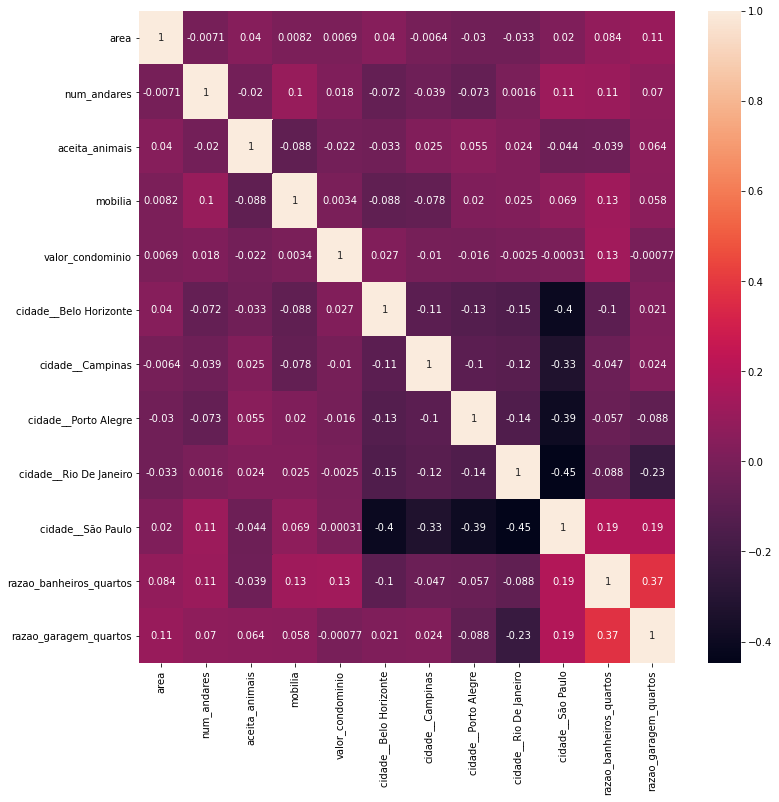

In [27]:
plt.figure(figsize=(12, 12))
corr = x.corr()
sns.heatmap(corr, annot = True);

In [28]:
for atributo in ['valor_condominio', 'area']:
    x[atributo + "_p2"] = x[atributo] ** 2
    x[atributo + "_p3"] = x[atributo] ** 3

## Geração de dataframes de teste e treinamento

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
cidades_x = ['cidade__Belo Horizonte', 'cidade__Campinas', 'cidade__Rio de Janeiro', 'cidade__São Paulo']

In [31]:
treino_X, teste_X, treino_y, teste_y = train_test_split(x, y, test_size=0.25, 
                                                    stratify=imoveis['cidade'])

## Métricas de avaliação

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
def calcular_metricas(teste_y, pred):
    print('MAE: ', mean_absolute_error(teste_y, pred))
    print('RMSE: ', mean_squared_error(teste_y, pred))
    print('R2: ', r2_score(teste_y, pred))

In [34]:
def mase(teste_y, pred, treino_y):
    e_t = teste_y - pred
    escala = mean_absolute_error(treino_y[1:], treino_y[:-1])
    print('MASE: ', np.mean(np.abs(e_t / escala)))

# Modelos de Predição

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
random_forest = RandomForestRegressor() 

In [37]:
random_forest.fit(treino_X, treino_y) 

RandomForestRegressor()

In [38]:
pred_rf = random_forest.predict(teste_X)

In [40]:
calcular_metricas(np.exp(teste_y), np.exp(pred_rf))

MAE:  1301.3211570735139
RMSE:  4616892.947895207
R2:  0.5646676715350466


In [41]:
mase(teste_y, pred_rf, treino_y)

MASE:  0.3531248221940835


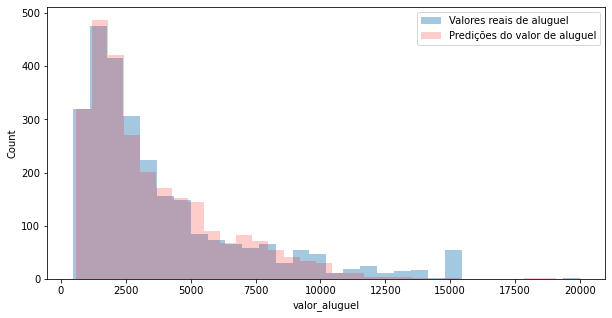

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x = np.exp(teste_y), kde=False, alpha = 0.4, bins=30, edgecolor='none')
sns.histplot(x = np.exp(pred_rf), color = 'r', alpha = 0.2, bins=30, edgecolor='none')
plt.legend(labels=['Valores reais de aluguel', 'Predições do valor de aluguel'])
plt.xlim([plt.xlim()[0],plt.xlim()[1]])
plt.show()

## XGBoost

In [43]:
from xgboost import XGBRegressor

In [44]:
xgb = XGBRegressor(n_estimators=1000, max_depth=6, learning_rate=0.1)

In [45]:
xgb.fit(treino_X, treino_y,
       eval_set=[(treino_X, treino_y), (teste_X, teste_y)], 
            early_stopping_rounds=15)

[0]	validation_0-rmse:6.74668	validation_1-rmse:6.74368
[1]	validation_0-rmse:6.07637	validation_1-rmse:6.07453
[2]	validation_0-rmse:5.47336	validation_1-rmse:5.47223
[3]	validation_0-rmse:4.93099	validation_1-rmse:4.93073
[4]	validation_0-rmse:4.44302	validation_1-rmse:4.44294
[5]	validation_0-rmse:4.00425	validation_1-rmse:4.00462
[6]	validation_0-rmse:3.60968	validation_1-rmse:3.61065
[7]	validation_0-rmse:3.25499	validation_1-rmse:3.25646
[8]	validation_0-rmse:2.93619	validation_1-rmse:2.93811
[9]	validation_0-rmse:2.64977	validation_1-rmse:2.65205
[10]	validation_0-rmse:2.39250	validation_1-rmse:2.39507
[11]	validation_0-rmse:2.16166	validation_1-rmse:2.16416
[12]	validation_0-rmse:1.95457	validation_1-rmse:1.95732
[13]	validation_0-rmse:1.76898	validation_1-rmse:1.77194
[14]	validation_0-rmse:1.60267	validation_1-rmse:1.60584
[15]	validation_0-rmse:1.45375	validation_1-rmse:1.45724
[16]	validation_0-rmse:1.32067	validation_1-rmse:1.32507
[17]	validation_0-rmse:1.20201	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
pred_xgb = xgb.predict(teste_X)

C:\Users\Jluss\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [47]:
calcular_metricas(np.exp(teste_y), np.exp(pred_xgb))

MAE:  1259.8903217422708
RMSE:  4275916.880405683
R2:  0.5968187105749942


In [48]:
mase(np.exp(teste_y), np.exp(pred_xgb), np.exp(treino_y))

MASE:  0.37043504056565685


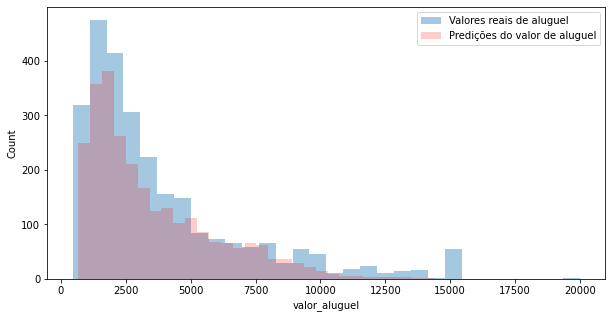

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(x = np.exp(teste_y), kde=False, alpha = 0.4, bins=30, edgecolor='none')
sns.histplot(x = np.exp(pred_xgb), color = 'r', alpha = 0.2, bins=30, edgecolor='none')
plt.legend(labels=['Valores reais de aluguel', 'Predições do valor de aluguel'])
plt.xlim([plt.xlim()[0],plt.xlim()[1]])
plt.show()

## Catboost

In [50]:
import catboost as cb

In [51]:
cat = cb.CatBoostRegressor(loss_function='RMSE', 
                           max_depth = 8,
                           learning_rate = 0.01,
                           grow_policy = 'Depthwise',
                           logging_level = 'Silent')

In [52]:
cat.fit(treino_X, treino_y, early_stopping_rounds=10)

In [53]:
pred_cat = cat.predict(teste_X)

In [54]:
calcular_metricas(np.exp(teste_y), np.exp(pred_cat))

MAE:  1239.7266504803677
RMSE:  4141567.9239707203
R2:  0.6094866335031903


In [55]:
mase(np.exp(teste_y), np.exp(pred_cat), np.exp(treino_y))

MASE:  0.3645064845215662


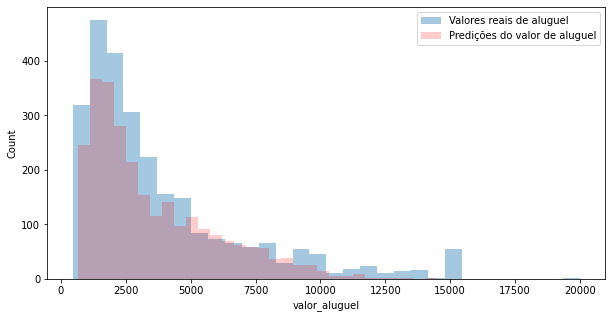

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(x = np.exp(teste_y), kde=False, alpha = 0.4, bins=30, edgecolor='none')
sns.histplot(x = np.exp(pred_cat), color = 'r', alpha = 0.2, bins=30, edgecolor='none')
plt.legend(labels=['Valores reais de aluguel', 'Predições do valor de aluguel'])
plt.xlim([plt.xlim()[0],plt.xlim()[1]])
plt.show()

## Detalhes de performance do melhor modelo

In [58]:
pd.DataFrame(np.exp(pred_cat), np.exp(teste_y), columns = ['Predição'])

Predição
valor_aluguel             
3000.0         2494.282685
3600.0         1385.097023
14000.0        9791.455670
4000.0         2925.313531
4200.0         6906.281713
...                    ...
4000.0         3617.134536
1300.0         2059.062493
10000.0        4850.730128
1290.0         1383.735322
2500.0         1314.727942

[2673 rows x 1 columns]

## Distribuição de valores de aluguel: Predição x Real

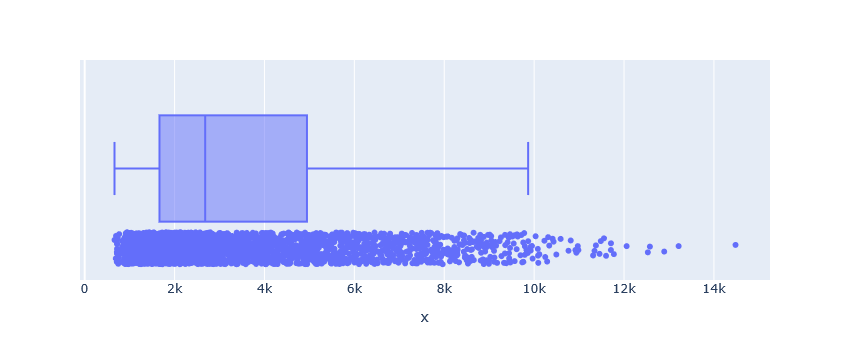

In [59]:
fig = px.box(x = np.exp(pred_cat), points="all")
fig.show();

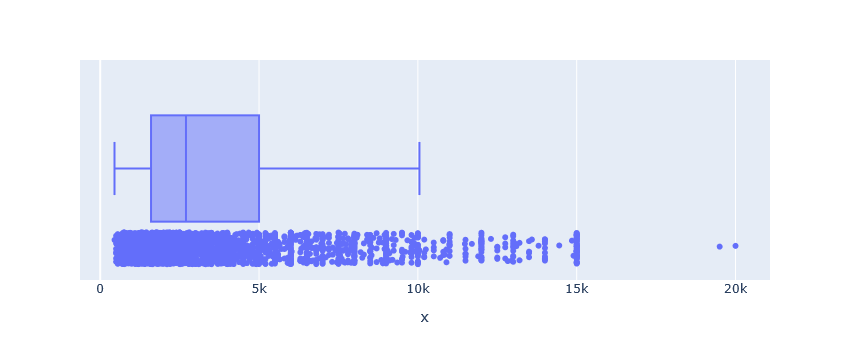

In [60]:
fig = px.box(x = np.exp(teste_y), points="all")
fig.show();

## Importância das Features

In [61]:
importancia_features_cat = cat.feature_importances_
importancia_features_cat_series = pd.Series(
    importancia_features_cat, index=treino_X.columns.values
    ).sort_values(ascending=False)

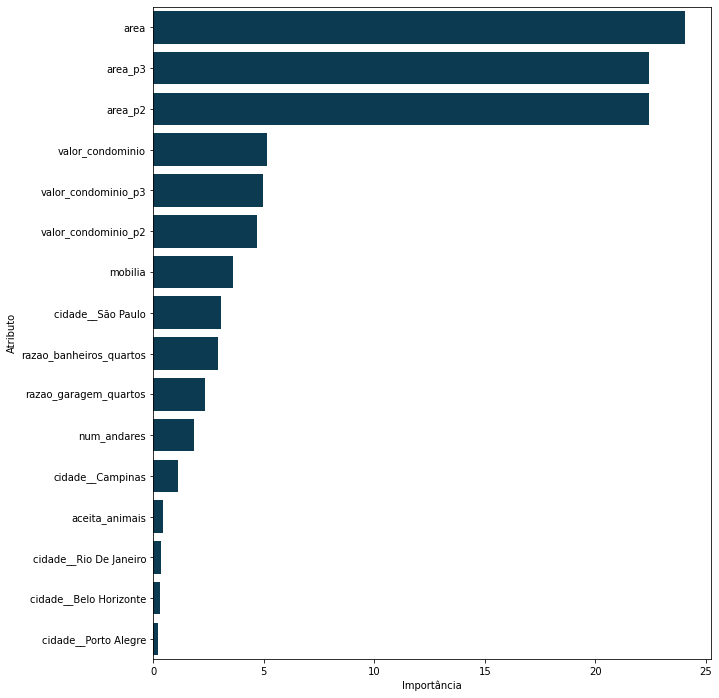

In [62]:
fig, ax = plt.subplots(figsize=(10, 12))
sns.barplot(x=importancia_features_cat_series, 
            y=importancia_features_cat_series.index, 
            color="#003f5c");
plt.xlabel('Importância');
plt.ylabel('Atributo');